In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data = data.drop('Unnamed: 32', axis=1)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# EDA

In [3]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

<AxesSubplot:>

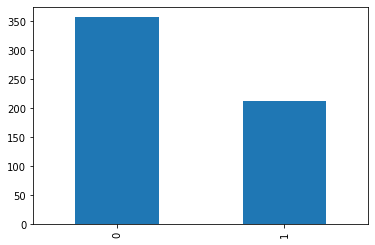

In [6]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))

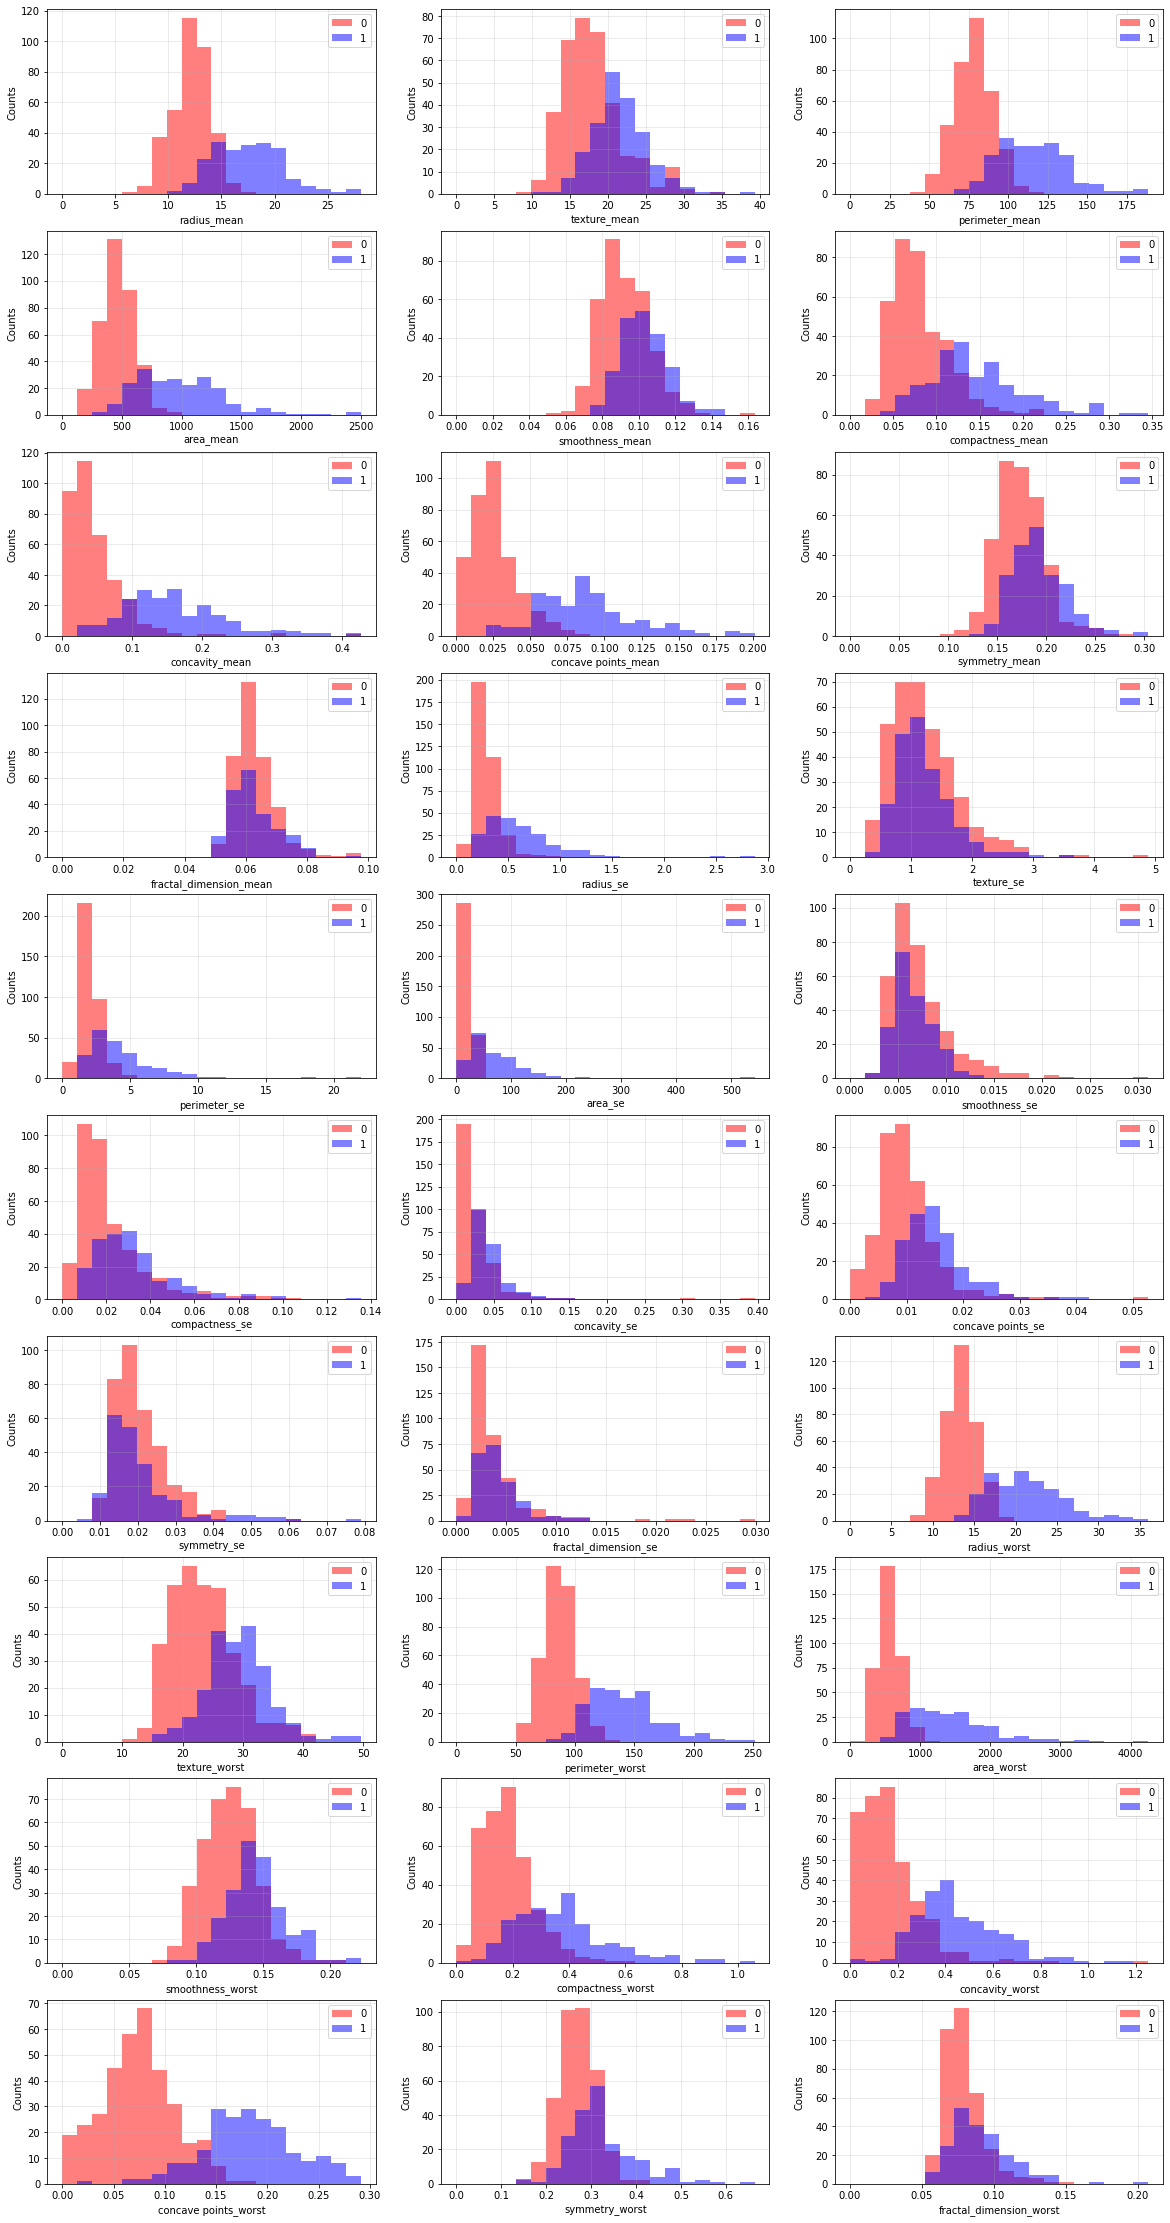

In [7]:
columns = data.columns.tolist()
columns.remove('diagnosis')
y_column = 'diagnosis'
plt.figure(figsize=(20, 40))

for col in range(len(columns)):
    
    plt.subplot(10, 3, col+1)
    x_col = data[columns[col]].values
    y_col = data[y_column].values
    
    bins = np.linspace(0, x_col.max(), 21)
    plt.grid(alpha = 0.3)
    plt.hist(x_col[y_col == 0], bins=bins, color='r', alpha=0.5, label='0')
    plt.hist(x_col[y_col == 1], bins=bins, color='b', alpha=0.5, label='1')
    
    plt.xlabel(columns[col])
    plt.ylabel('Counts')
    plt.legend(loc='best')
    
plt.show()

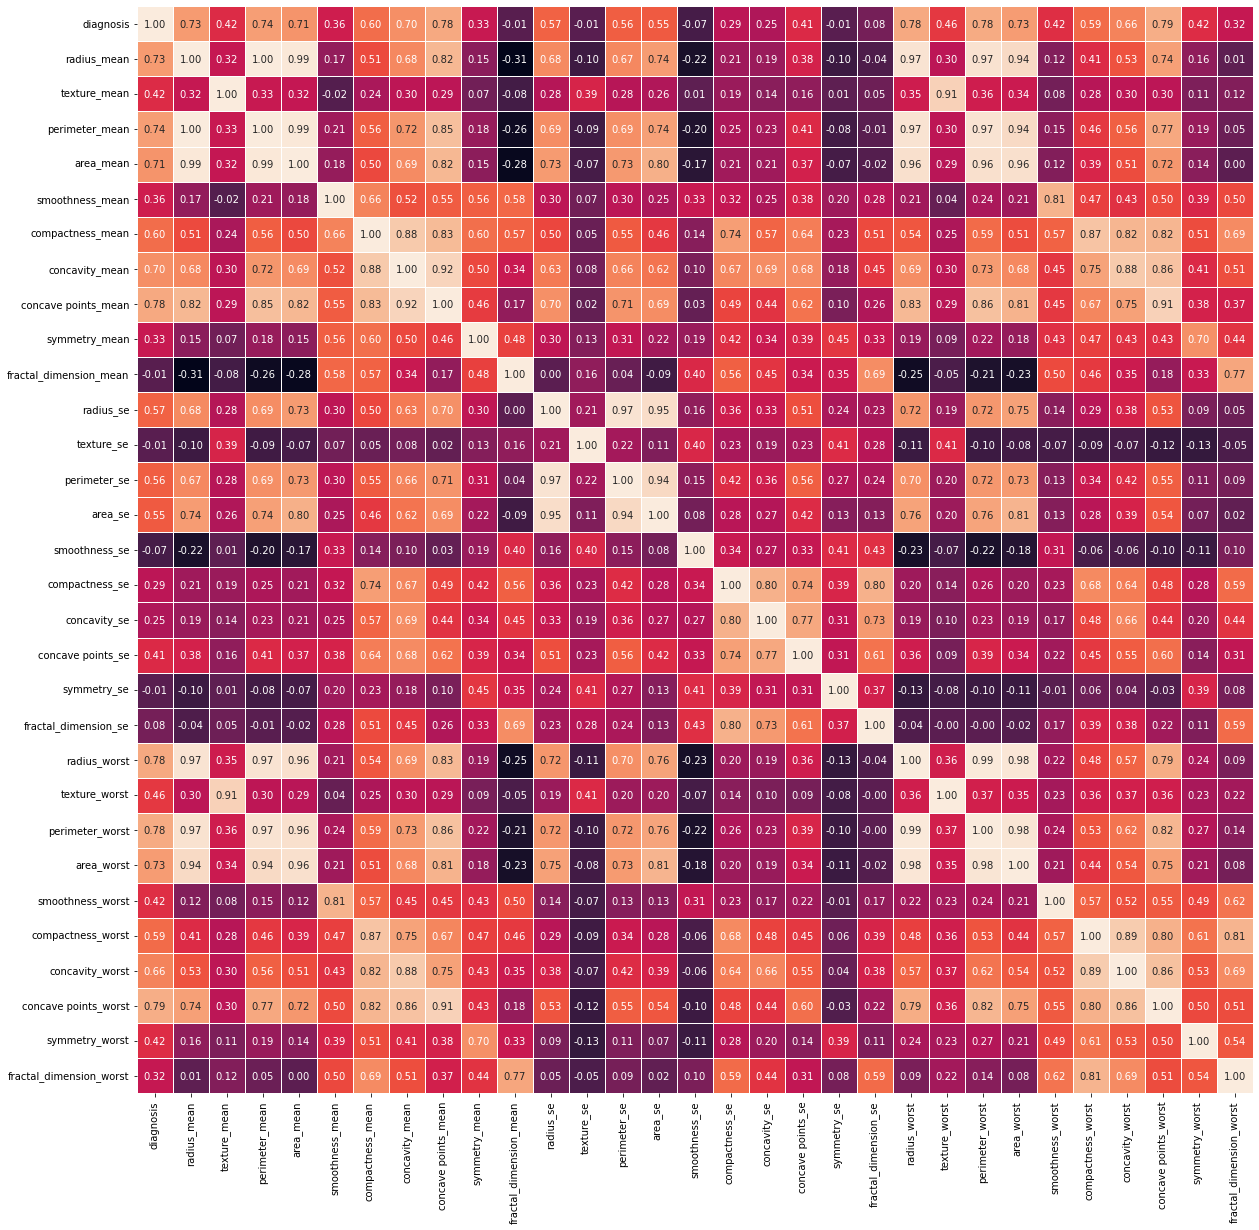

In [8]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

perimeter_mean radius_mean
area_mean radius_mean
radius_worst radius_mean
perimeter_worst radius_mean
area_mean perimeter_mean
radius_worst perimeter_mean
perimeter_worst perimeter_mean
radius_worst area_mean
perimeter_worst area_mean
area_worst area_mean
perimeter_se radius_se
area_se radius_se
perimeter_worst radius_worst
area_worst radius_worst
area_worst perimeter_worst


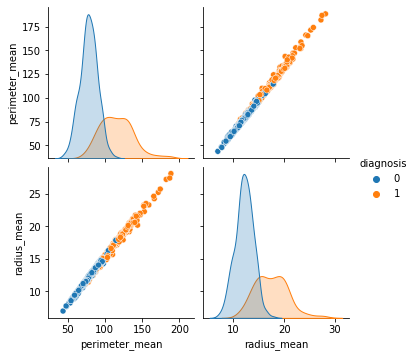

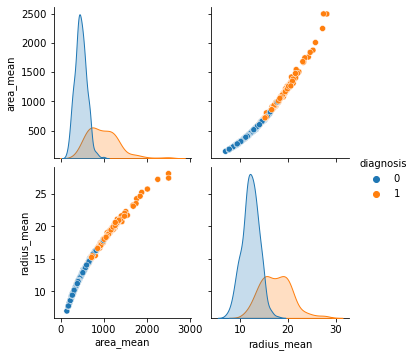

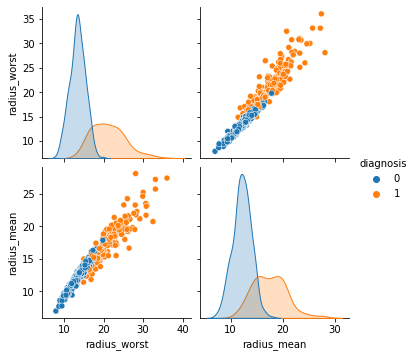

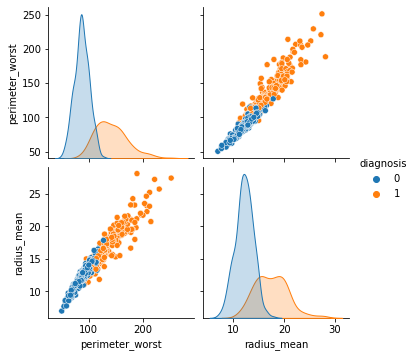

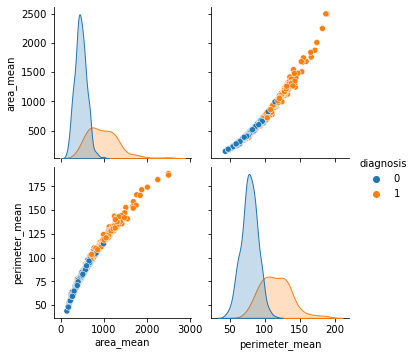

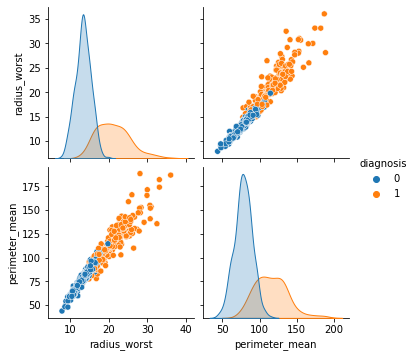

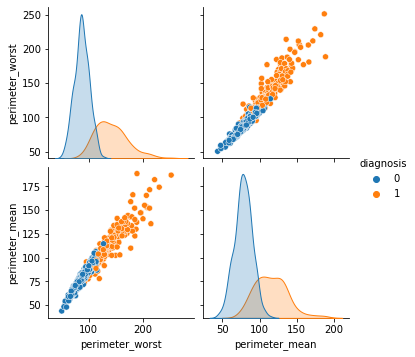

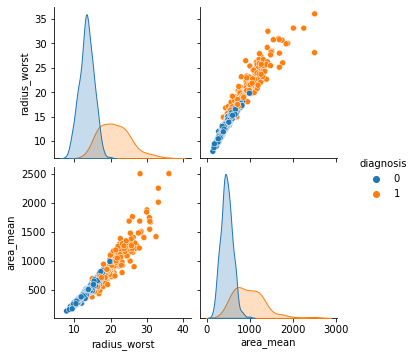

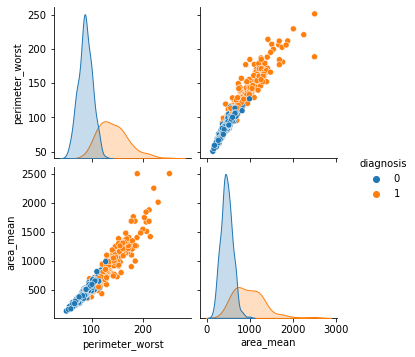

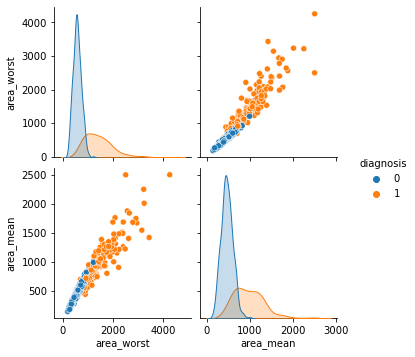

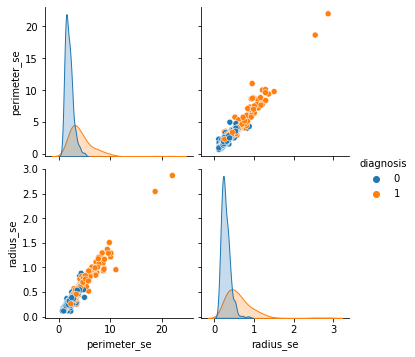

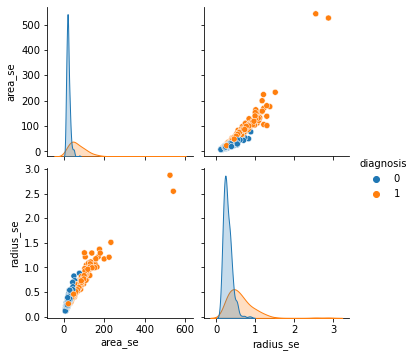

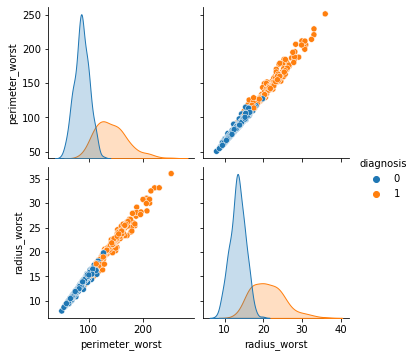

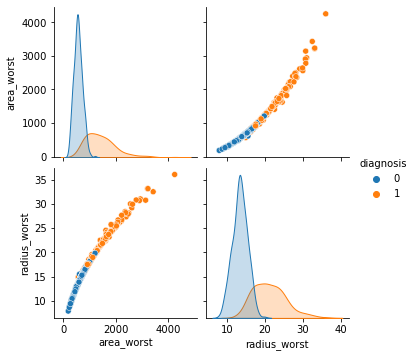

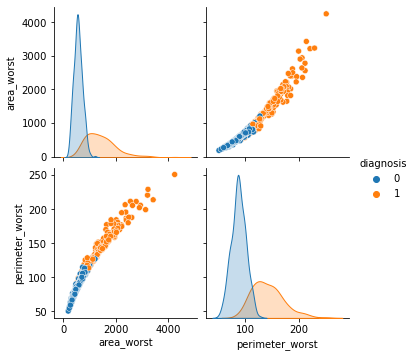

In [9]:
corr_matrix = data.drop('diagnosis', axis=1).corr()
list = corr_matrix.columns.tolist()
k = 0
for col in corr_matrix.columns.tolist():
    list.remove(col)
    for ind in list:
        if corr_matrix.loc[ind, col] > 0.95:
            print(ind, col)
            sns.pairplot(data.loc[:, [ind, col, 'diagnosis']], hue='diagnosis')
            k += 1

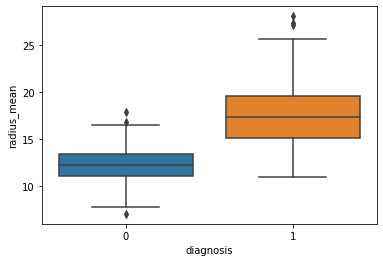

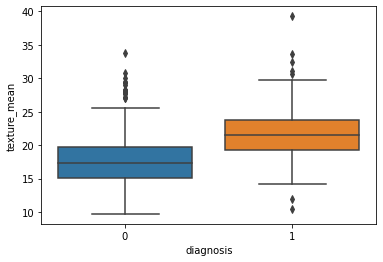

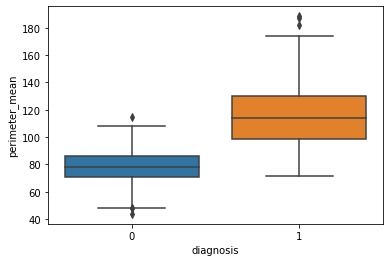

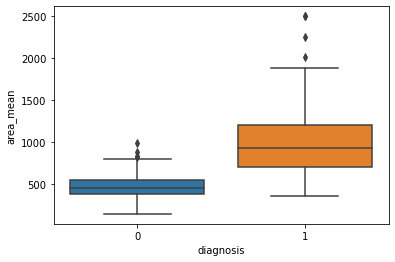

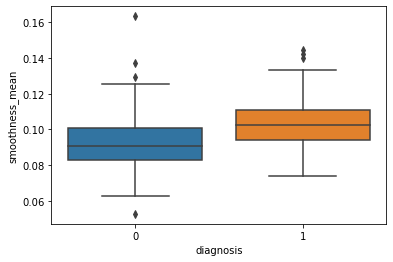

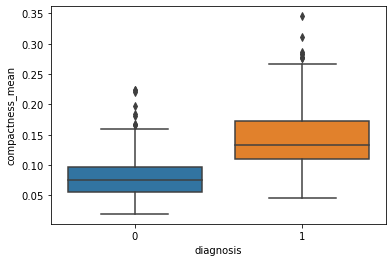

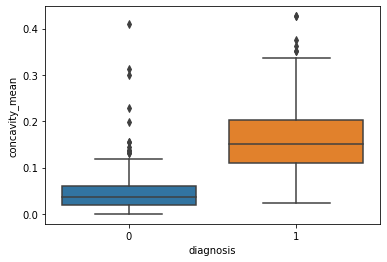

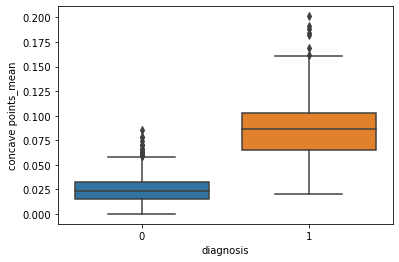

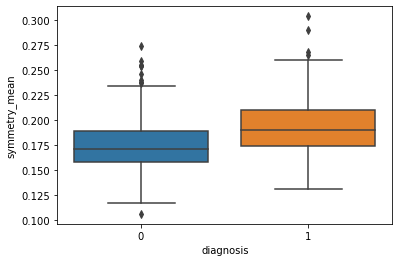

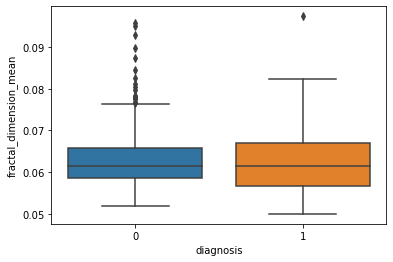

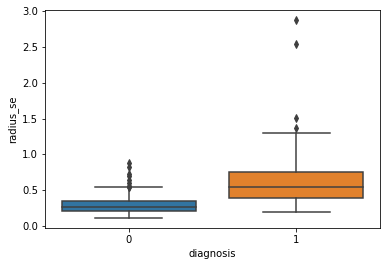

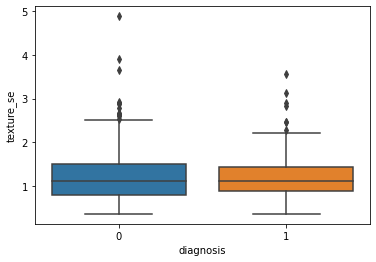

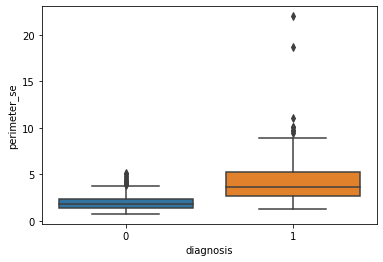

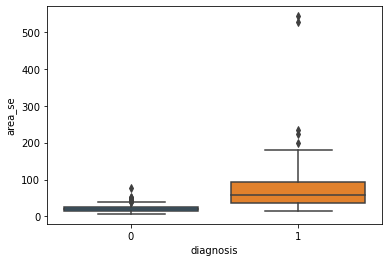

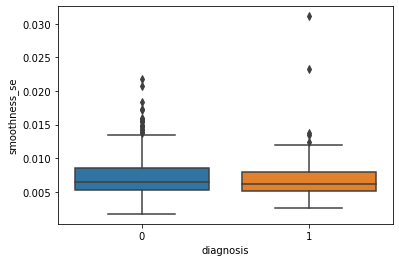

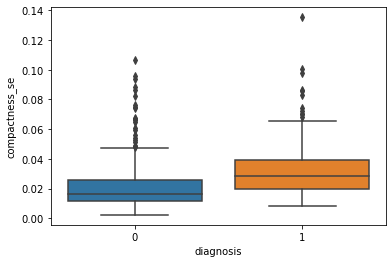

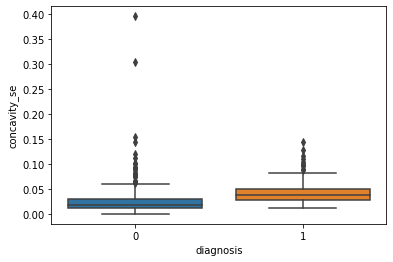

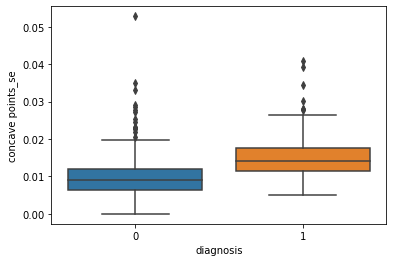

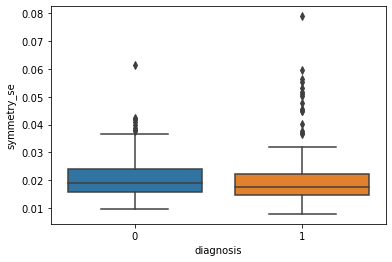

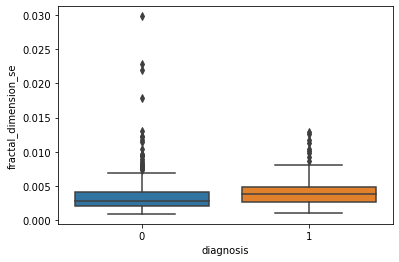

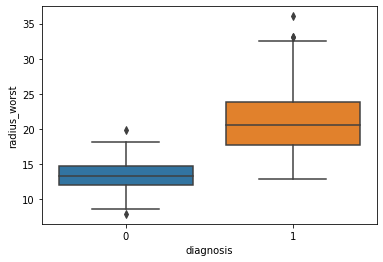

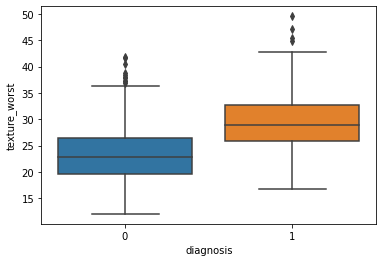

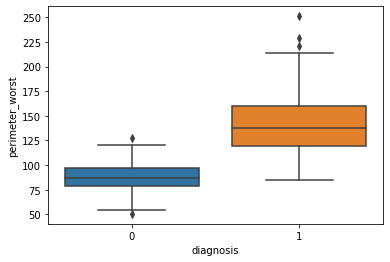

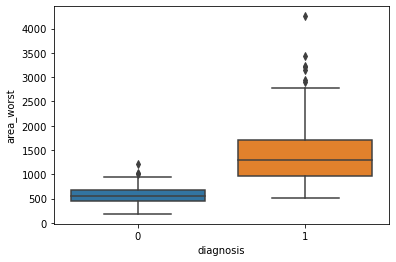

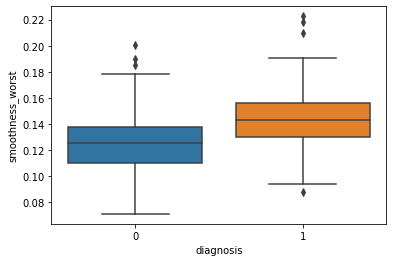

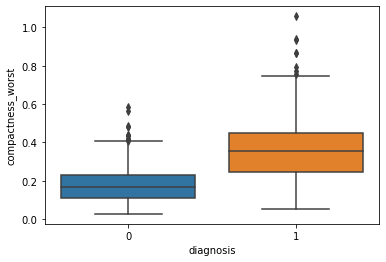

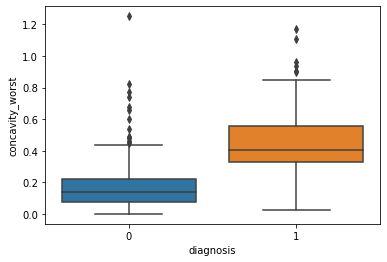

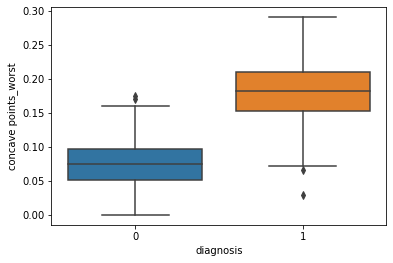

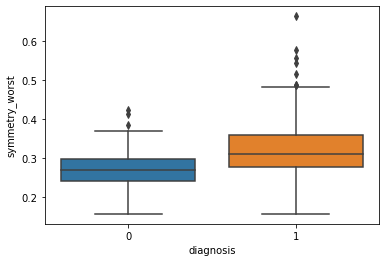

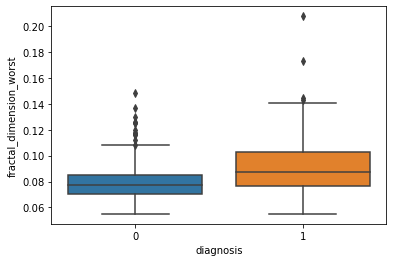

In [10]:
columns = corr_matrix.columns.tolist()
for i in columns:
    sns.boxplot(data=data, x='diagnosis', y=i)
    plt.show()

# Классы хорошо разделяются по признакам:
    radius_mean
    radius_worst
    concave points_mean
    area_se
    concave points_worst
    
    
# Кроме того, можно попробовать использовать:
    perimeter_mean
    concavity_mean
    radius_se
    perimeter_se
    perimeter_worst
    area_worst

# Моделирование

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['diagnosis'], axis=1),
                                                    data['diagnosis'], test_size=0.3,
                                                    random_state=42,
                                                    stratify=data['diagnosis'])

Данные имеют различную размерность. Например, эти показатели имеют такие средние значения:
    
    perimeter_mean 91.969033
    area_mean 654.889104
    smoothness_mean 0.096360
    
При построении модели погрешность вычисления расстояния будет выше без предварительной нормализации.

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
def accuracy_assessment(y_pred, y_test):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    print('Accuracy: ', accuracy_score(y_pred, y_test))
    print('Precision: ', precision_score(y_pred, y_test))
    print('Recall: ', recall_score(y_pred, y_test))
    print('f1: ', f1_score(y_pred, y_test))
    print('ROC-AUC: ', round(roc_auc_score(y_test, y_pred), 3))

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_assessment(y_pred, y_test)

Accuracy:  0.9649122807017544
Precision:  0.90625
Recall:  1.0
f1:  0.9508196721311475
ROC-AUC:  0.953


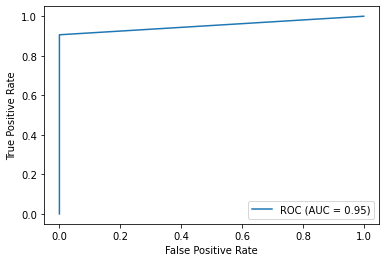

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='ROC')
display.plot()
plt.show()

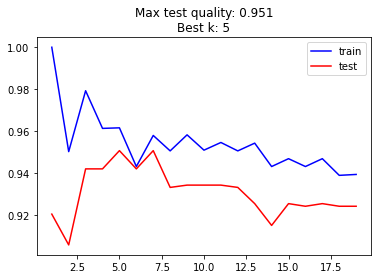

In [16]:
neighbors = range(1, 20)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

Наилучшие результаты достигаются при k равных 5 и 7.

In [17]:
knn_new = KNeighborsClassifier(n_neighbors=7)
knn_new.fit(X_train_scaled, y_train)
y_pred_new = knn_new.predict(X_test_scaled)
accuracy_assessment(y_pred_new, y_test)

Accuracy:  0.9649122807017544
Precision:  0.90625
Recall:  1.0
f1:  0.9508196721311475
ROC-AUC:  0.953


In [18]:
knn_new = KNeighborsClassifier(n_neighbors=5)
knn_new.fit(X_train_scaled, y_train)
y_pred_new = knn_new.predict(X_test_scaled)
accuracy_assessment(y_pred_new, y_test)

Accuracy:  0.9649122807017544
Precision:  0.90625
Recall:  1.0
f1:  0.9508196721311475
ROC-AUC:  0.953


# Логистическая регрессия

In [19]:
corr_matrix = data.drop('diagnosis', axis=1).corr()
list = corr_matrix.columns.tolist()
drop_list = []
k = 0
for col in corr_matrix.columns.tolist():
    list.remove(col)
    for ind in list:
        if corr_matrix.loc[ind, col] > 0.85:
            if not col in drop_list:
                drop_list.append(col)
print(drop_list)
non_lineral_data = data.drop(drop_list, axis=1)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concavity_worst']


In [20]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(non_lineral_data.drop(['diagnosis'],axis=1),
                                                    data['diagnosis'], test_size=0.3,
                                                    random_state=46,
                                                    stratify=data['diagnosis'])
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
accuracy_assessment(y_pred, y_test)

Accuracy:  0.9766081871345029
Precision:  0.96875
Recall:  0.96875
f1:  0.96875
ROC-AUC:  0.975


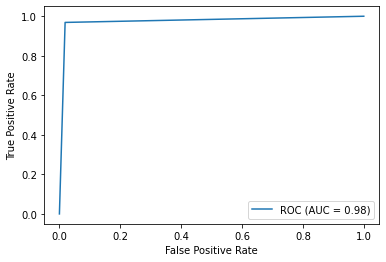

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='ROC')
display.plot()
plt.show()

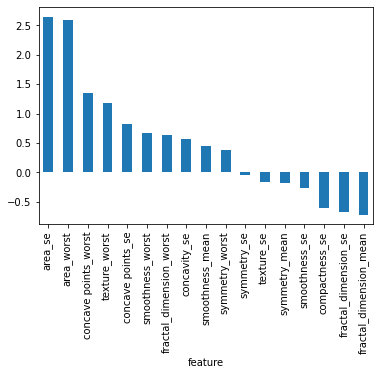

In [22]:
featureImportance = pd.DataFrame({"feature": non_lineral_data.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l2')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(non_lineral_data.drop(['diagnosis'], axis=1), non_lineral_data['diagnosis'])
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 100} 	 Best score:  0.9957125603864736


In [24]:
log_reg = LogisticRegression(penalty = 'l2', C=100)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
accuracy_assessment(y_pred, y_test)

Accuracy:  0.9590643274853801
Precision:  0.9375
Recall:  0.9523809523809523
f1:  0.9448818897637795
ROC-AUC:  0.955


# Вывод:
логистическая регрессия обеспечивает более высокие показатели точности, но наилучший результат достигается при построении логистической регрессии с параметрами по умолчанию